# Interpolación con Splines Cúbicos
Los **splines cúbicos** son una mejora significativa sobre los splines lineales. En lugar de conectar los puntos con líneas rectas, se utilizan polinomios cúbicos (de tercer grado) para cada intervalo entre puntos.
 
La principal ventaja es que se imponen condiciones para que no solo la función sea continua, sino también su **primera y segunda derivada** en los puntos de datos (nudos). Esto elimina las "esquinas" de los splines lineales y produce una curva mucho más suave y estéticamente agradable, que a menudo representa mejor el comportamiento de los fenómenos físicos.

Para determinar los coeficientes de todos los polinomios cúbicos, se resuelve un sistema de ecuaciones lineales, que a menudo es tridiagonal, lo que hace que el cálculo sea muy eficiente.


## Ejemplo: Datos de Propiedades del Aire
 
**Problema:**

A partir de la siguiente tabla de propiedades del aire, usar splines cúbicos para estimar la densidad a una temperatura de $350^\circ C$.


In [1]:
from mnspy import SplineCubica
import numpy as np

In [2]:
# Definimos los datos de Temperatura (T) y Densidad (rho).
# Para los splines, los puntos deben estar ordenados por el eje x.
T = np.array([-40., 0., 20., 50., 100, 150, 200, 250, 300, 400, 500])
rho = np.array([1.52, 1.29, 1.2, 1.09, 0.95, 0.84, 0.75, 0.68, 0.62, 0.53, 0.46])

In [3]:
# Creamos una instancia de la clase `SplineCubica`.
# En este paso, la biblioteca calcula los coeficientes de todos los polinomios cúbicos que forman el spline.
sc = SplineCubica(T, rho)

In [4]:
# Evaluamos la densidad a T = 350°C.
# El método encontrará el intervalo que contiene a 350 (en este caso, [300, 400]) y usará el polinomio cúbico correspondiente.
densidad_350 = sc.evaluar(350)
print(f"La densidad interpolada a 350°C es: {densidad_350:.4f} kg/m³")

La densidad interpolada a 350°C es: 0.5708 kg/m³


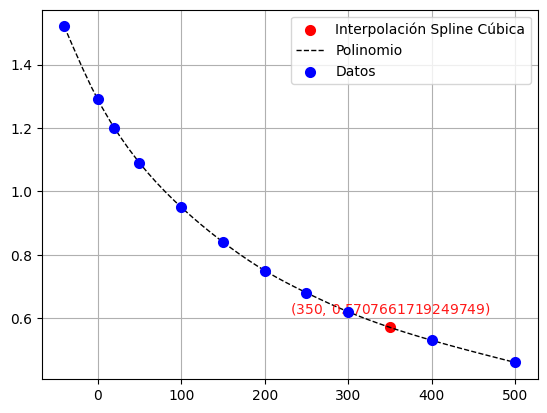

In [5]:
# Graficamos los datos y la interpolación.
# Se puede observar la suavidad de la curva que pasa por todos los puntos.
sc.graficar(350)

In [6]:
# Obtenemos la ecuación del polinomio cúbico específico para cada intervalo.
sc.obtener_polinomio()

<IPython.core.display.Math object>